# Notebook #5: Series temporales: predicción a futuro del parque vehicular; Prophet

In [6]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
from prophet import Prophet

# Importar las clases
# -----------------------------------------------------------------------
import sys
sys.path.append('../..')
from src import soporte_temporales as st
from src import soporte_sarima as ss
from src import soporte_funciones_BBDD as sfbd
from src import soporte_variables_vehiculos as svv

# Modelo Series Temporales
# -----------------------------------------------------------------------
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA



# Visualizar las métricas de error en y_test
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuraciones
# -----------------------------------------------------------------------
pd.options.display.float_format = '{:.0f}'.format
from itertools import product

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Modelo ARIMA

In [18]:
df_autos_historicos = sfbd.dbeaver_fetch(sfbd.dbeaver_conexion("proyecto_final"),svv.query_autos_historico)

In [19]:
df_autos_historicos.columns = ['FECHA', 'Vehículos']
df_autos_historicos['FECHA'] = pd.to_datetime(df_autos_historicos['FECHA'].astype(str) + '-12-31')
df_autos_historicos.head()

,FECHA,Vehículos
0,1998-12-31,936083
1,1999-12-31,1090833
2,2000-12-31,1294998
3,2001-12-31,1436165
4,2002-12-31,1611023


In [20]:
df_autos_historicos.columns = ['ds', 'y']

In [21]:
df_autos_historicos.head()

,ds,y
0,1998-12-31,936083
1,1999-12-31,1090833
2,2000-12-31,1294998
3,2001-12-31,1436165
4,2002-12-31,1611023


In [22]:
df_autos_historicos.tail()

,ds,y
22,2020-12-31,4842367
23,2021-12-31,5152448
24,2022-12-31,5463996
25,2023-12-31,5810888
26,2024-12-31,6160988


In [23]:
m = Prophet()
m.fit(df_autos_historicos)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=2, freq='Y') 
m.predict(future)

13:06:51 - cmdstanpy - INFO - Chain [1] start processing
13:06:51 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1998-12-31,662029,914563,1004220,662029,662029,297142,297142,297142,297142,297142,297142,0,0,0,959171
1,1999-12-31,811432,1077110,1166740,811432,811432,312234,312234,312234,312234,312234,312234,0,0,0,1123665
2,2000-12-31,961244,1219553,1310908,961244,961244,305977,305977,305977,305977,305977,305977,0,0,0,1267220
3,2001-12-31,1110558,1362525,1450071,1110558,1110558,295056,295056,295056,295056,295056,295056,0,0,0,1405614
4,2002-12-31,1237511,1485684,1579025,1237511,1237511,297142,297142,297142,297142,297142,297142,0,0,0,1534653
5,2003-12-31,1364241,1626699,1719842,1364241,1364241,312234,312234,312234,312234,312234,312234,0,0,0,1676475
6,2004-12-31,1491318,1747853,1840656,1491318,1491318,305977,305977,305977,305977,305977,305977,0,0,0,1797295
7,2005-12-31,1618048,1864626,1960523,1618048,1618048,295056,295056,295056,295056,295056,295056,0,0,0,1913104
8,2006-12-31,1744804,1996552,2083202,1744804,1744804,297142,297142,297142,297142,297142,297142,0,0,0,2041946
9,2007-12-31,1914753,2181562,2275658,1914753,1914753,312234,312234,312234,312234,312234,312234,0,0,0,2226987


In [24]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
24,2022-12-31,5491881,5441739,5536683
25,2023-12-31,5800888,5756501,5848647
26,2024-12-31,6089352,6042146,6134637
27,2025-12-31,6372347,6327662,6419748
28,2026-12-31,6668348,6616597,6724989


In [25]:
df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df['autos'] = df_autos_historicos['y']
df = df[df['autos'].notnull() & df['yhat'].notnull()]
df.tail(5)

,ds,yhat,yhat_lower,yhat_upper,autos
22,2020-12-31,4912885,4869163,4959167,4842367
23,2021-12-31,5195880,5151306,5241145,5152448
24,2022-12-31,5491881,5441739,5536683,5463996
25,2023-12-31,5800888,5756501,5848647,5810888
26,2024-12-31,6089352,6042146,6134637,6160988


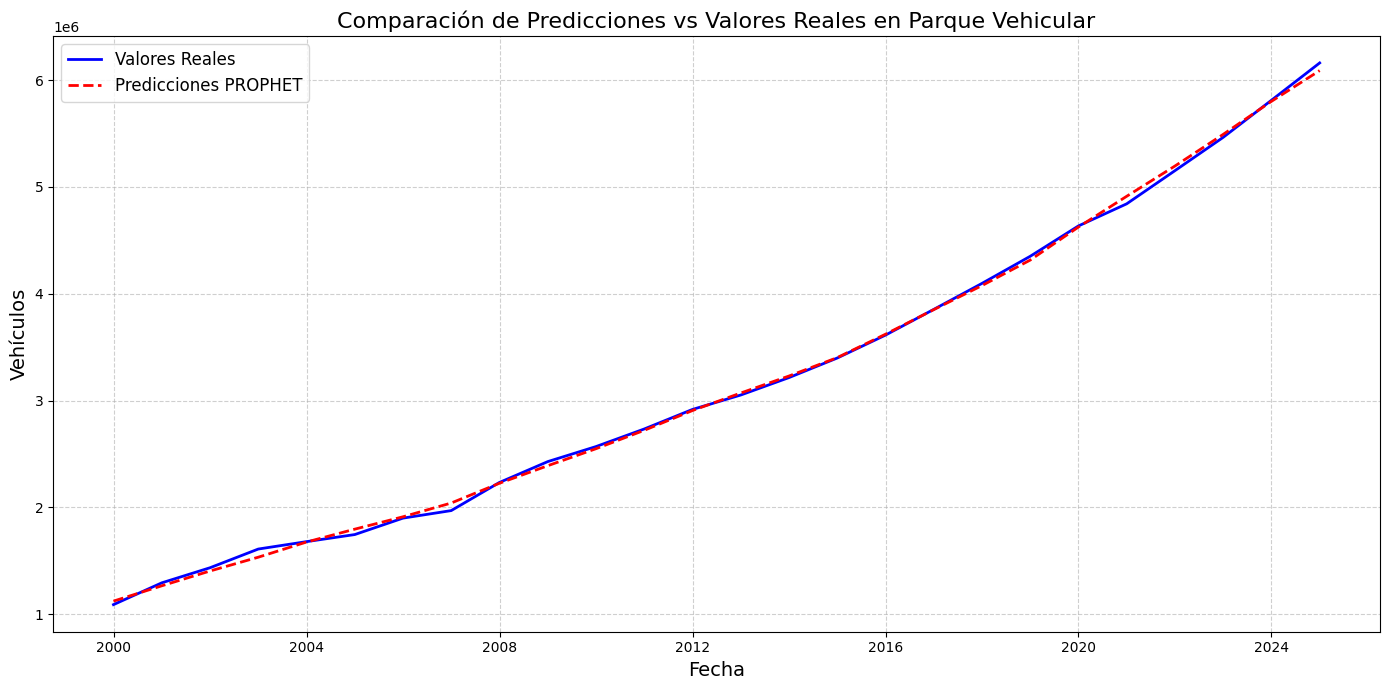

In [29]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df[1:], x="ds", y="autos", label="Valores Reales", color="blue", linewidth=2) # valores reales
sns.lineplot(data=df[1:], x="ds", y="yhat", label="Predicciones PROPHET", color="red", linestyle="--", linewidth=2) # predicciones
plt.title("Comparación de Predicciones vs Valores Reales en Parque Vehicular", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Vehículos", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6) # formato cuadriculado
plt.tight_layout()
plt.show()

In [26]:
# Seleccionar las columnas relevantes
y_real = df['autos']
y_pred = df['yhat']

# Cálculo de MAE
mae = mean_absolute_error(y_real, y_pred)
mape = mean_absolute_percentage_error(y_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_real, y_pred))

# Imprimir los resultados
print(f"MAE: {mae}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse}")

MAE: 27953.415849852558
MAPE: 1.20%
RMSE: 35695.90172282073


    - Se puede evidenciar un modelo mucho más ajustado, con resultados más reducidos y que de igual forma siguen el patrón de la serie de datos.

In [27]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

## Tendencias

In [28]:
plot_components_plotly(m, forecast)

- En la parte superior, se observa el comportamiento a largo plazo del modelo donde señala una tendencia ascendente. Es decir, el parque vehicular va en aumento.

- En la parte inferior, se muestra la estacionalidad del modelo Esto tendría sentido en caso de tener los valores mensuales. Al no tener estos, se pueden ver dos picos claros: al principio y al final. Esto viene explicado por la tendencia que hemos comentado de aumento a través del tiempo.